<a href="https://colab.research.google.com/github/mansiraturi/FakeNewsDetection/blob/main/FakeNewsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import dask.dataframe as dd
from dask.multiprocessing import get
from nltk.stem import WordNetLemmatizer


In [ ]:
import matplotlib.pyplot as plt

# Preprocessing Data
import nltk
from nltk.tokenize import word_tokenize
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import one_hot

#converting to vectors
from gensim.models import Word2Vec

# Building Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, LSTM, Bidirectional
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# model Validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/preNews.csv', delimiter=",")
df.head()

,news,class
0,budget fight loom republican flip fiscal scrip...,1
1,militari accept transgend recruit monday penta...,1
2,senior republican senat let mueller job washin...,1
3,fbi russia probe help australian diplomat tipo...,1
4,trump want postal servic charg much amazon shi...,1


In [ ]:
corpus=[]

In [ ]:
for i in range(0, len(df)):
  rev = re.sub(r'[^a-zA-Z\s]', ' ', df['news'][i])
  rev =  rev.split()
  rev = ' '.join(rev)
  corpus.append(rev)

In [ ]:
print(corpus[:2])

['budget fight loom republican flip fiscal script washington reuter the head conserv republican faction congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint keep sharp pivot way among republican repres mark meadow speak face nation drew hard line feder spend lawmak brace battl januari when return holiday wednesday lawmak begin tri pas feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat want proport increas nondefens discretionari spend program support educ scientif research infrastructur public health environment protect the trump administr alreadi will say increas nondefens discretionari spend percent meadow chairman small influenti hous freedom caucu said program now democrat say enough need give govern pay rais percent for fiscal conserv see rational eventu run peopl money s

In [ ]:
#divide into train and test set
X = df.drop("class", axis=1)
y = df["class"]

**Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=5500, ngram_range=(1,3))  #will take a combination of 1,2 or 3 words and count the frequency
x_cv = cv.fit_transform(corpus).toarray()

In [ ]:
x_cv.shape

(44838, 5500)

In [ ]:
feature_names = cv.get_feature_names_out()
print(feature_names[:20])


['abandon' 'abba' 'abc' 'abc new' 'abdullah' 'abe' 'abedin' 'abid' 'abil'
 'abl' 'abort' 'about' 'abroad' 'absenc' 'absolut' 'absurd' 'abu' 'abus'
 'academ' 'academi']


In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5500,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
xc_train, xc_test, yc_train, yc_test= train_test_split(x_cv, y, test_size=.25, stratify=y, random_state=42)

In [ ]:
count_df = pd.DataFrame(xc_train, columns = cv.get_feature_names_out())

In [ ]:
count_df.head()

,abandon,abba,abc,abc new,abdullah,abe,abedin,abid,abil,abl,...,your,youth,youtub,ypg,zealand,zero,zika,zimbabw,zone,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# sorted(zip(classifier.coef_[0]))
# we need a model which trains x_cv and this classifier model is then sorted to get the features with most frequency

**TF-IDF Vectors**

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=.25, stratify=y, random_state=42)

In [ ]:
len(y_train)

33628

In [ ]:
len(x_train)

33628

In [ ]:
#vectorizing x as raw data can't be used directly to perform calculations so we convert textual data to numeric data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization= TfidfVectorizer()
# Tfidf- term frequency/inverse document frequency: counts the frequency of a word in a file
xv_train = vectorization.fit_transform(x_train['news'])
xv_test = vectorization.transform(x_test['news'])


In [ ]:
from sklearn.naive_bayes import MultinomialNB
MB = MultinomialNB()
MB.fit(xv_train, y_train)
pred_MB = MB.predict(xv_test)
MB_acc = MB.score(xv_test, y_test)

In [ ]:
print(pred_MB)

[0 1 1 ... 0 0 1]


In [ ]:
print(MB_acc)

0.9411239964317574


In [ ]:
print(classification_report(y_test, pred_MB))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5863
           1       0.94      0.94      0.94      5347

    accuracy                           0.94     11210
   macro avg       0.94      0.94      0.94     11210
weighted avg       0.94      0.94      0.94     11210



In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
X_df = X.copy()
y_df= y.copy()

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

X_df['tokens'] = X_df['news'].apply(lambda x: word_tokenize(x))

# Train Word2Vec model using Gensim
word2vec_model = Word2Vec(sentences=X_df['tokens'], vector_size=100, window=5, min_count=3, workers=2, epochs=10)

# Save the trained Word2Vec model if needed
word2vec_model.save("word2vec_model.model")

# Get word vectors using Gensim
word_vectors_gensim = {word: word2vec_model.wv[word].tolist() for word in word2vec_model.wv.index_to_key}

# Show word vectors using Gensim
for word, vector in list(word_vectors_gensim.items())[:5]:
    print(f'{word}: {vector}')


trump: [0.24943725764751434, 0.2871953547000885, -1.6766794919967651, 0.6568116545677185, -4.298946857452393, 2.9204444885253906, 1.3839951753616333, -2.8915774822235107, -0.14933724701404572, 0.9820129871368408, -1.0006996393203735, 1.2044992446899414, -0.7841105461120605, 1.8135277032852173, -2.8738322257995605, -3.143169641494751, 0.47507283091545105, 4.425313949584961, 1.0306642055511475, -0.526606559753418, 1.0593782663345337, 1.5716592073440552, -0.11411906033754349, 1.2844539880752563, -0.8665936589241028, 0.8779049515724182, 1.7362582683563232, 0.42940255999565125, -2.8078360557556152, -1.2084709405899048, 0.30791494250297546, -1.5127878189086914, 1.6082290410995483, -2.2414305210113525, -1.0446279048919678, -0.2785964012145996, 0.5218765735626221, -0.11956803500652313, 0.737395167350769, -0.7304701805114746, -0.5670835375785828, 1.2601877450942993, -1.4483599662780762, 1.2331312894821167, 0.9038975834846497, -0.26454755663871765, -0.7900117635726929, -1.3644351959228516, 0.704

In [ ]:
def agg_vectors(tokens, word2vec_model):
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

In [ ]:
X_df.head()

,news,tokens
0,budget fight loom republican flip fiscal scrip...,"[budget, fight, loom, republican, flip, fiscal..."
1,militari accept transgend recruit monday penta...,"[militari, accept, transgend, recruit, monday,..."
2,senior republican senat let mueller job washin...,"[senior, republican, senat, let, mueller, job,..."
3,fbi russia probe help australian diplomat tipo...,"[fbi, russia, probe, help, australian, diploma..."
4,trump want postal servic charg much amazon shi...,"[trump, want, postal, servic, charg, much, ama..."


In [ ]:
X_df['vector'] = X_df['tokens'].apply(lambda tokens: agg_vectors(tokens, word2vec_model))

# Prepare features for the Naive Bayes model
X_vec = pd.DataFrame(X_df['vector'].tolist(), index=X.index)


In [ ]:
#power tranformation
#X_vec = np.sqrt(X_vec.abs()) * np.sign(X_vec)

In [ ]:
X_vec[X_vec < 0] = 0

In [ ]:
y_df.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_df, test_size=0.25, random_state=42)

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = nb_model.predict(X_test)

# Evaluate the model
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.872078501338091


<Axes: >

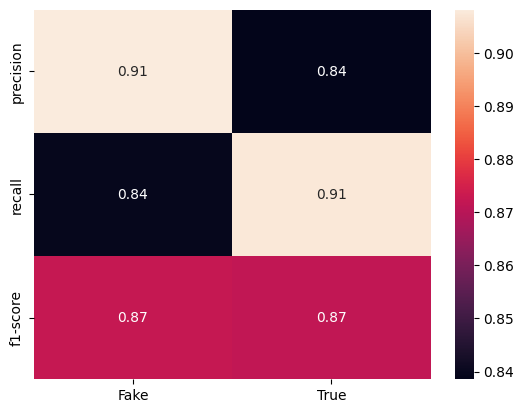

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, predictions, target_names=['Fake', 'True'], output_dict=True)
cleaned_report={}
cleaned_report['Fake']=clf_report['Fake']
cleaned_report['True']=clf_report['True']
sns.heatmap(pd.DataFrame(cleaned_report).iloc[:-1,:],annot=True)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

#Y=1/(1+e^(-z)) ; if prediction is greater than the threshold value-> classified as 1 or true news
#Z=w.x+b
#Y=prediction probability(determines whether label will be 0 or 1), x=input features
#w=weights (how important a feature is), b=biases(intercept)
LR=LogisticRegression()
LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_LR = LR.predict(X_test)
LR_acc=LR.score(X_test, y_test)

In [ ]:
LR_acc

0.9400535236396075

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score , f1_score
cm = confusion_matrix(y_test, pred_LR)
print(cm)
as2=accuracy_score(y_test, pred_LR)
ps2=precision_score(y_test, pred_LR)
r2=recall_score(y_test, pred_LR)
f12=f1_score(y_test, pred_LR)
print("Accuracy Score :",accuracy_score(y_test, pred_LR))
print("Precision Score :",precision_score(y_test, pred_LR))
print("Recall Score :",recall_score(y_test, pred_LR))
print("f1 Score :",f1_score(y_test, pred_LR))

[[5471  371]
 [ 301 5067]]
Accuracy Score : 0.9400535236396075
Precision Score : 0.9317763883780802
Recall Score : 0.9439269746646796
f1 Score : 0.9378123264852859


In [ ]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5842
           1       0.93      0.94      0.94      5368

    accuracy                           0.94     11210
   macro avg       0.94      0.94      0.94     11210
weighted avg       0.94      0.94      0.94     11210



<Axes: >

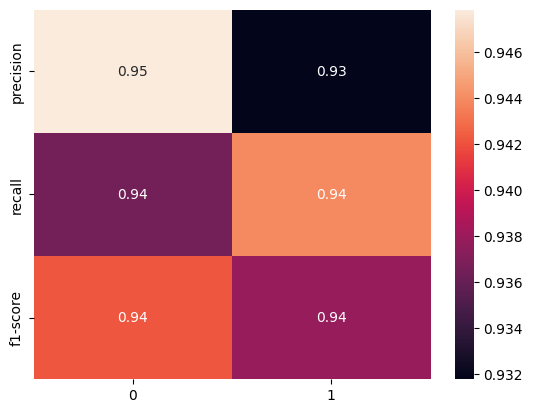

In [ ]:
#Heat Map
import seaborn as sns
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, pred_LR, target_names=['0', '1'], output_dict=True)
cleaned_report={}
cleaned_report['0']=clf_report['0']
cleaned_report['1']=clf_report['1']
sns.heatmap(pd.DataFrame(cleaned_report).iloc[:-1,:],annot=True)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()
DT_acc=DT.score(X_test, y_test)
pred_DT =  DT.predict(X_test)
print(classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      5842
           1       0.91      0.88      0.89      5368

    accuracy                           0.90     11210
   macro avg       0.90      0.90      0.90     11210
weighted avg       0.90      0.90      0.90     11210



In [ ]:
cm = confusion_matrix(y_test, pred_DT)
print(cm)
as3=accuracy_score(y_test, pred_DT)
ps3=precision_score(y_test, pred_DT)
r3=recall_score(y_test, pred_DT)
f13=f1_score(y_test, pred_DT)
print("Accuracy Score :",accuracy_score(y_test, pred_DT))
print("Precision Score :",precision_score(y_test, pred_DT))
print("Recall Score :",recall_score(y_test, pred_DT))
print("f1 Score :",f1_score(y_test, pred_DT))


[[5385  457]
 [ 659 4709]]
Accuracy Score : 0.9004460303300624
Precision Score : 0.9115369725125823
Recall Score : 0.8772354694485842
f1 Score : 0.8940573381431554


<Axes: >

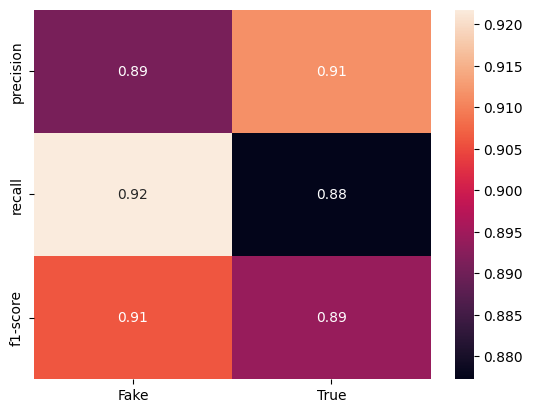

In [ ]:
#Heat Map
import seaborn as sns
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, pred_DT, target_names=['Fake', 'True'], output_dict=True)
cleaned_report={}
cleaned_report['Fake']=clf_report['Fake']
cleaned_report['True']=clf_report['True']
sns.heatmap(pd.DataFrame(cleaned_report).iloc[:-1,:],annot=True)

**LSTM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Divide into train and test set
X = df['news']
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=42)

# Tokenize the text
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

# Convert text to sequences
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

# Pad sequences to have the same length
max_sequence_length = 100  # Choose an appropriate value
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Build LSTM model
embedding_dim = 50  # Choose an appropriate value
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(units=50),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_padded, y_train, epochs=5, validation_data=(x_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test_padded, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


**Comparison**

In [ ]:
comp_graph_data=[['Nave Bayes',as1,ps1,r1,f11],['Logistic Regressioon',as2,ps2,r2,f12], ['Decision Tree',as3,ps3,r3,f13]]
df=pd.DataFrame(comp_graph_data, columns=['Algorithm', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
df.set_index('Algorithm', inplace=True)
df